In [1]:
from bidict import bidict
from collections import defaultdict
import itertools
import os
import pandas as pd
import pickle
import lzma

from conllu import parse, parse_incr
import numpy as np
from cp_orth import orth_als
from sklearn.decomposition import PCA
import sktensor

from decomp_pmi import VerbTensor

import matplotlib.pyplot as plt
%pylab inline
matplotlib.rcParams.update({'font.size': 14})

import logging
logging.basicConfig(level=logging.INFO, format='%(levelname)-8s [%(lineno)d] %(message)s')

Populating the interactive namespace from numpy and matplotlib


In [23]:
pylab.rcParams['figure.figsize'] = (10, 6)

# DepCC

In [3]:
svo_count = pd.read_pickle(os.path.join(config['DEFAULT']['ProjectDirectory'],'dataframe/depCC/assoc0.pkl'))

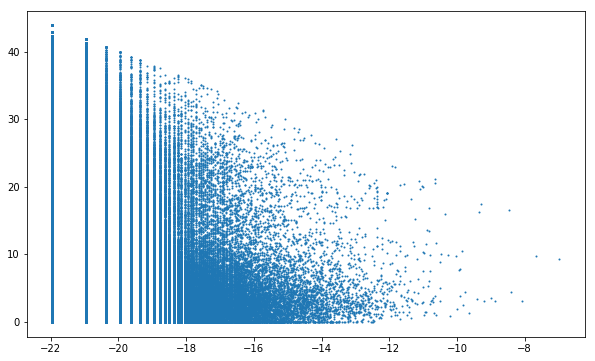

In [11]:
_ = plt.scatter(svo_count.log_freq, svo_count.pmi, s=1)

In [4]:
pca = PCA(n_components=2)

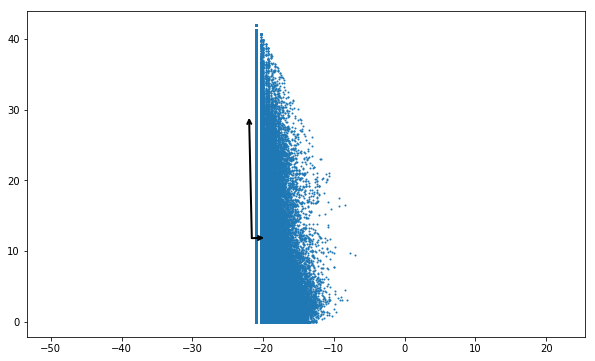

In [22]:
weight = 'pmi'
comps = pca.fit_transform(svo_count[['log_freq', weight]].values)

X = svo_count[svo_count.freq>1][['log_freq', weight]].values
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], s=1)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
#plt.xscale('log')

Text(0, 0.5, 'Interaction information')

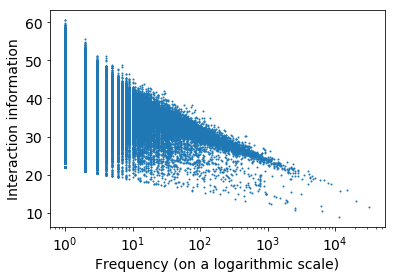

In [24]:
_ = plt.scatter(svo_count.freq, svo_count.iact_info, s=1)
plt.xscale('log')
plt.xlabel('Frequency (on a logarithmic scale)')
plt.ylabel('Interaction information')

Text(0, 0.5, 'log-Dice')

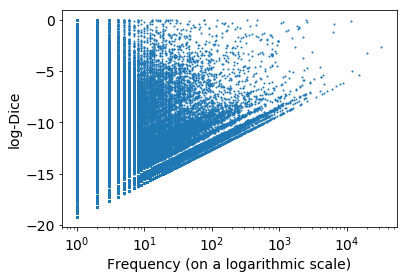

In [27]:
_ = plt.scatter(svo_count.freq, svo_count.log_dice, s=1)
plt.xscale('log')
plt.xlabel('Frequency (on a logarithmic scale)')
plt.ylabel('log-Dice')

In [28]:
plt.savefig('/home/makrai/repo/paper/EurNLP/verbtensor/img/plot-log-dice.png')

<Figure size 432x288 with 0 Axes>